In [195]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
import sys
sys.path.insert(0, '..')
import argparse

import os
import random

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [197]:
from config import parse_args_ddqn,parse_global_args, get_sweep_params
from dqn.dqn_runner import evaluate_policy, UpdateCartpoleParams, UpdateAcrobotParams, UpdateMountaincarParams
from dqn.dqn_visualize import train_and_evaluate, LoadModel
from dqn.dqn import DQN_Agent

In [198]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [199]:
parent = argparse.ArgumentParser()
global_parser = parse_global_args(parent)
ddqn_parser = parse_args_ddqn(global_parser)

# Cartpole

In [161]:
updater = UpdateCartpoleParams()
args = updater.update_parser(ddqn_parser)[0]
args.EnvIdex = 0

In [162]:
temp_vanilla_cp_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_rew_cartpole_earlystop_sched1_5e5_ema'))
temp_vanilla_cp_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_error_cartpole_earlystop_ema'))

temp_r2_cp_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'r2_rew_cartpole_lr_alpha4_earlystop_sched1_5e5_ema'))
temp_r2_cp_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'r2_error_cartpole_lr_alpha4_earlystop_sched1_5e5_ema'))

temp_robust_cp_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'robust_rew_cartpole_lr_alpha4_earlystop_sched1_5e5_ema'))
temp_robust_cp_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'robust_error_cartpole_alpha4_lr_earlystop_sched1_5e5_ema'))

# Cartpole Pole Length Evaluation

In [ ]:
sweep_str = 'length'
sweep_vector = get_sweep_params(0, 'length')
sweep_param = [sweep_vector, sweep_str]

In [ ]:
file_end = '.npy'
vanilla_cp_file_rew = temp_vanilla_cp_file_rew + sweep_str + file_end
vanilla_cp_file_error = temp_vanilla_cp_file_error + sweep_str + file_end

r2_cp_file_rew = temp_r2_cp_file_rew + sweep_str + file_end
r2_cp_file_error = temp_r2_cp_file_error + sweep_str + file_end

robust_cp_file_rew = temp_robust_cp_file_rew + sweep_str + file_end
robust_cp_file_error = temp_robust_cp_file_error + sweep_str + file_end

# Vanilla DDQN cartpole evaluation

In [10]:
model_subfolder = 'vanilla_cartpole_reduleLR_scheduler1_5e5_ema'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [12]:
vanilla_cp_rew, vanilla_cp_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
  0%|                                                    | 0/17 [00:00<?, ?it/s]/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalCartPole-v1
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalCartPoleStochasticReward-v1
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalAcrobot-v0
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalMountainCar-v0
  logger.warn("Overriding environment {}".format(id))

100%|███████████████████████████████████████████| 

In [13]:
np.save(vanilla_cp_file_rew, vanilla_cp_rew)
np.save(vanilla_cp_file_error, vanilla_cp_error)

In [14]:
vanilla_cp_rew

array([[  2. , 222.4, 369.2, 414. , 424.1, 478.9, 499.3, 500. , 492.1,
        454.8, 160.9,  58.4,  43.8,  40.2,  40.8,  43.5,  44. ],
       [  2. , 281.8, 493.4, 498.1, 498.4, 499.4, 499. , 498.2, 492.1,
        434.1, 286.3, 141.1, 102.6,  81.2,  72.6,  54.7,  54.9],
       [  2. , 498.1, 500. , 500. , 500. , 500. , 500. , 500. , 500. ,
        500. , 500. , 461.3, 420.5, 317.4, 247.7, 199. , 179.2],
       [  2. , 277.5, 409.4, 419.4, 420.6, 436.9, 434.8, 437. , 296.5,
        259.6, 194.6, 159.5, 128.8, 110.2,  82.3,  80.4,  64. ],
       [  2. , 476.3, 434.1, 465.3, 489.8, 499.9, 499.6, 499.9, 340.6,
        252.2, 293.8, 113.5,  85.5,  88.6,  85.5,  83.5,  86.9]])

# R2 DDQN cartpole evaluation

In [16]:
model_subfolder = 'R2_cartpole_reduleLR_scheduler1_5e5_ema'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [17]:
r2_cp_rew, r2_cp_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|███████████████████████████████████████████| 17/17 [02:46<00:00,  9.80s/it]
1it [02:46, 166.56s/it]
100%|███████████████████████████████████████████| 17/17 [03:13<00:00, 11.36s/it]
2it [05:59, 174.52s/it]
100%|███████████████████████████████████████████| 17/17 [02:28<00:00,  8.75s/it]
3it [08:28, 166.77s/it]
100%|███████████████████████████████████████████| 17/17 [01:26<00:00,  5.10s/it]
4it [09:55, 142.74s/it]
100%|███████████████████████████████████████████| 17/17 [01:05<00:00,  3.85s/it]
5it [11:00, 132.11s/it]


In [18]:
np.save(r2_cp_file_rew, r2_cp_rew)
np.save(r2_cp_file_error, r2_cp_error)

In [19]:
r2_cp_rew

array([[  2. ,  26.1, 500. , 500. , 500. , 500. , 500. , 500. , 500. ,
        500. , 500. , 493. , 312.4, 251.8, 255.4, 158.6, 134.7],
       [  2. , 404.9, 500. , 500. , 500. , 500. , 500. , 500. , 500. ,
        494.1, 358.3, 272.7, 217.2, 191.6, 177.1, 168.3, 153.6],
       [  2. , 331.1, 500. , 500. , 500. , 500. , 500. , 500. , 496.3,
        467.8, 463.7, 229.3,  94.3,  86.3,  82.5,  82. ,  80.6],
       [  2. , 249.7, 500. , 500. , 500. , 500. , 500. , 500. , 500. ,
        275.6, 185. , 147.2, 104.3,  93.6,  93.2,  98.2, 104.6],
       [  2. , 199.3, 498.4, 500. , 500. , 500. , 500. , 500. , 413.7,
         55. ,  41.1,  38.7,  42.4,  47.4,  50.3,  54.6,  58.3]])

# Robust DDQN cartpole evaluation

In [20]:
model_subfolder = 'ro_cartpole_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [21]:
robust_cp_rew, robust_cp_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|███████████████████████████████████████████| 17/17 [01:11<00:00,  4.18s/it]
1it [01:11, 71.08s/it]
100%|███████████████████████████████████████████| 17/17 [01:24<00:00,  4.95s/it]
2it [02:35, 75.01s/it]
100%|███████████████████████████████████████████| 17/17 [01:25<00:00,  5.03s/it]
3it [04:00, 78.19s/it]
100%|███████████████████████████████████████████| 17/17 [01:01<00:00,  3.64s/it]
4it [05:02, 73.28s/it]
100%|███████████████████████████████████████████| 17/17 [01:41<00:00,  5.94s/it]
5it [06:43, 80.75s/it]


In [22]:
np.save(robust_cp_file_rew, robust_cp_rew)
np.save(robust_cp_file_error, robust_cp_error)

# Load data

In [165]:
vanilla_cp_rew = np.load(vanilla_cp_file_rew)
vanilla_cp_error = np.load(vanilla_cp_file_error)

In [166]:
r2_cp_rew = np.load(r2_cp_file_rew)
r2_cp_error = np.load(r2_cp_file_error)

In [167]:
robust_cp_rew = np.load(robust_cp_file_rew)
robust_cp_error = np.load(robust_cp_file_error)

<Figure size 640x480 with 0 Axes>

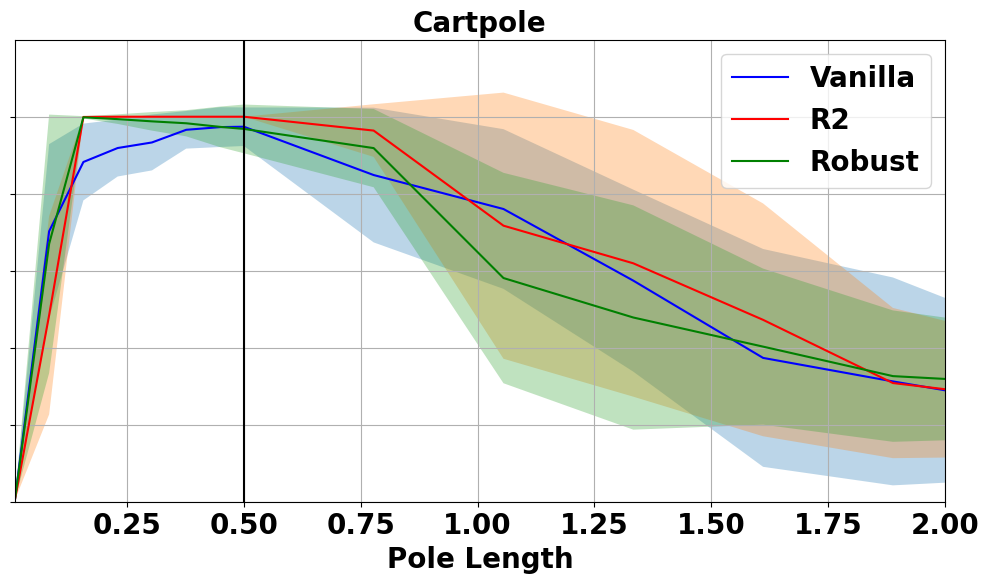

In [169]:
plt.clf()
fontsize = 20
fig, ax = plt.subplots(figsize=(12, 6))

vanilla_cp_mean = np.mean(vanilla_cp_rew, axis=0)
vanilla_cp_std = np.std(vanilla_cp_rew, axis=0)

r2_cp_mean = np.mean(r2_cp_rew, axis=0)
r2_cp_std = np.std(r2_cp_rew, axis=0)

robust_cp_mean = np.mean(robust_cp_rew, axis=0)
robust_cp_std = np.std(robust_cp_rew, axis=0)

ax.plot(sweep_vector, vanilla_cp_mean,'b', label='Vanilla') 
ax.fill_between(sweep_vector, vanilla_cp_mean-vanilla_cp_std, vanilla_cp_mean+vanilla_cp_std, alpha=0.3)
ax.plot(sweep_vector, r2_cp_mean,'r', label='R2') 
ax.fill_between(sweep_vector, r2_cp_mean-r2_cp_std, r2_cp_mean+r2_cp_std, alpha=0.3)

ax.plot(sweep_vector, robust_cp_mean,'g', label='Robust')
ax.fill_between(sweep_vector, robust_cp_mean-robust_cp_std, robust_cp_mean+robust_cp_std, alpha=0.3)

    
ax.invert_xaxis()
ax.set_xlabel('Pole Length', fontsize=fontsize)
# ax.set_ylabel('Reward', fontsize=fontsize)
ax.set_title('Cartpole', fontweight="bold", fontsize=fontsize)
ax.set_yticks(range(0,600,100))
ax.set_ylim([0, 600])
# ax.set_xlim(np.min(sweep_vector),np.max(sweep_vector))
ax.set_xlim(np.min(sweep_vector), 2)
plt.axvline(x=0.5, c='black')
ax.tick_params(axis='both', labelsize=fontsize)

frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])

ax.grid(True)
ax.legend(prop={'size': fontsize})
plt.savefig(os.path.abspath('../plots/cartpole_pole_len_full_mean.png'))

# Cartpole Masspole

In [170]:
sweep_str = 'masspole'
sweep_vector = get_sweep_params(0, sweep_str)
sweep_param = [sweep_vector, sweep_str]

In [171]:
file_end = '.npy'
vanilla_cp_file_rew = temp_vanilla_cp_file_rew + sweep_str + file_end
vanilla_cp_file_error = temp_vanilla_cp_file_error + sweep_str + file_end

r2_cp_file_rew = temp_r2_cp_file_rew + sweep_str + file_end
r2_cp_file_error = temp_r2_cp_file_error + sweep_str + file_end

robust_cp_file_rew = temp_robust_cp_file_rew + sweep_str + file_end
robust_cp_file_error = temp_robust_cp_file_error + sweep_str + file_end

# Vanilla DDQN cartpole evaluation

In [28]:
model_subfolder = 'vanilla_cartpole_reduleLR_scheduler1_5e5_ema'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [29]:
vanilla_cp_rew, vanilla_cp_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|███████████████████████████████████████████| 16/16 [01:14<00:00,  4.69s/it]
1it [01:15, 75.05s/it]
100%|███████████████████████████████████████████| 16/16 [02:24<00:00,  9.00s/it]
2it [03:39, 95.75s/it]
100%|███████████████████████████████████████████| 16/16 [02:27<00:00,  9.22s/it]
3it [06:06, 111.26s/it]
100%|███████████████████████████████████████████| 16/16 [02:05<00:00,  7.83s/it]
4it [08:11, 115.47s/it]
100%|███████████████████████████████████████████| 16/16 [02:28<00:00,  9.29s/it]
5it [10:40, 128.09s/it]


In [30]:
np.save(vanilla_cp_file_rew, vanilla_cp_rew)
np.save(vanilla_cp_file_error, vanilla_cp_error)

# R2 DDQN cartpole evaluation

In [32]:
model_subfolder = 'R2_cartpole_reduleLR_scheduler1_5e5_ema'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [33]:
r2_cp_rew, r2_cp_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|███████████████████████████████████████████| 16/16 [00:54<00:00,  3.41s/it]
1it [00:54, 54.61s/it]
100%|███████████████████████████████████████████| 16/16 [01:34<00:00,  5.93s/it]
2it [02:29, 66.68s/it]
100%|███████████████████████████████████████████| 16/16 [02:29<00:00,  9.37s/it]
3it [04:59, 91.63s/it]
100%|███████████████████████████████████████████| 16/16 [01:07<00:00,  4.21s/it]
4it [06:06, 84.34s/it]
100%|███████████████████████████████████████████| 16/16 [01:04<00:00,  4.04s/it]
5it [07:11, 86.25s/it]


In [34]:
np.save(r2_cp_file_rew, r2_cp_rew)
np.save(r2_cp_file_error, r2_cp_error)

In [35]:
r2_cp_rew

array([[500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ,
          6.4,   3. ,   2. ,   7. ,  29.1,  52.8,  61.3],
       [500. , 500. , 500. , 500. , 500. , 500. , 500. , 495.9, 423.3,
        306.4,   3. ,   2. ,   6.2,  10. ,  13.6,  16.5],
       [500. , 500. , 500. , 500. , 500. , 500. , 499.8, 499.5, 497.1,
         23.5,   3. ,   2. ,   7.8,  18.1,  30.8,  42.4],
       [500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. , 499.2,
          5.5,   3. ,   2. ,   8.8,  12.3,  14.3,  18.2],
       [500. , 500. , 500. , 500. , 500. , 500. , 499.7, 493.8, 294. ,
         27.9,   3. ,   2. ,  11.9,  13.8,  20.2,  23.3]])

# Robust DDQN cartpole evaluation

In [10]:
model_subfolder = 'ro_cartpole_sweep'
# last one
# model_subfolder = 'robust_cartpole_reduleLR_scheduler1_5e5_ema'

# model_subfolder = 'robust_cartpole_sweep_reduceLR_earlystop'
model_name = os.listdir(os.path.abspath(os.path.join('dqn', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [11]:
robust_cp_rew, robust_cp_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
  0%|                                                    | 0/16 [00:00<?, ?it/s]/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalCartPole-v1
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalCartPoleStochasticReward-v1
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalAcrobot-v0
  logger.warn("Overriding environment {}".format(id))
/home/jenya/miniconda3/envs/project2/lib/python3.8/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment LocalMountainCar-v0
  logger.warn("Overriding environment {}".format(id))

100%|███████████████████████████████████████████| 

In [12]:
np.save(robust_cp_file_rew, robust_cp_rew)
np.save(robust_cp_file_error, robust_cp_error)

In [13]:
robust_cp_rew

array([[500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. , 497.2,
        217.4,   3.7,   2. ,   6. ,  26.6,  48.7,  57.4],
       [500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. , 499.9,
        476.2,   6.9,   2. ,   6. ,  10. ,  12.1,  14. ],
       [409.4, 426.7, 428.8, 423.3, 437.8, 470.7, 496.9, 494.8, 491.8,
        211.3,   7.8,   2. ,   6. ,   9. ,  12. ,  13.9],
       [500. , 500. , 500. , 500. , 500. , 500. , 500. , 499.3, 141.4,
          5.9,   3. ,   2. ,  11.9,  13.2,  15. ,  17.4],
       [500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ,
         11. ,   3. ,   2. ,   7.7,  15.4,  17.4,  20.2]])

# Load data

In [172]:
vanilla_cp_rew = np.load(vanilla_cp_file_rew)
vanilla_cp_error = np.load(vanilla_cp_file_error)

In [173]:
r2_cp_rew = np.load(r2_cp_file_rew)
r2_cp_error = np.load(r2_cp_file_error)

In [174]:
robust_cp_rew = np.load(robust_cp_file_rew)
robust_cp_error = np.load(robust_cp_file_error)

In [62]:
vanilla_cp_rew.shape

(5, 16)

<Figure size 640x480 with 0 Axes>

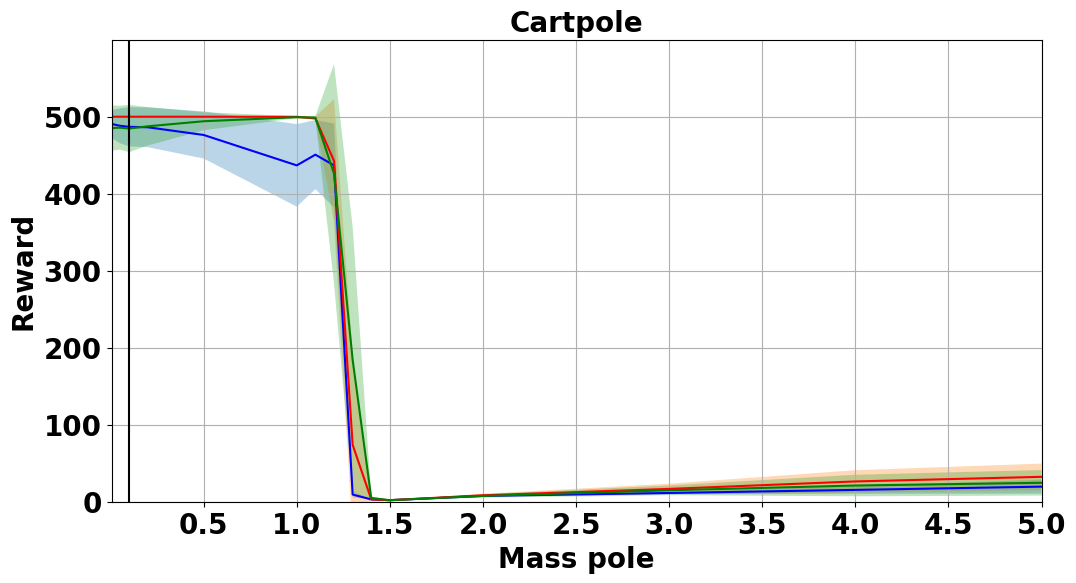

In [175]:
plt.clf()
fontsize = 20
fig, ax = plt.subplots(figsize=(12, 6))

vanilla_cp_mean = np.mean(vanilla_cp_rew, axis=0)
vanilla_cp_std = np.std(vanilla_cp_rew, axis=0)

r2_cp_mean = np.mean(r2_cp_rew, axis=0)
r2_cp_std = np.std(r2_cp_rew, axis=0)

robust_cp_mean = np.mean(robust_cp_rew, axis=0)
robust_cp_std = np.std(robust_cp_rew, axis=0)

ax.plot(sweep_vector, vanilla_cp_mean,'b', label='Vanilla') 
ax.fill_between(sweep_vector, vanilla_cp_mean-vanilla_cp_std, vanilla_cp_mean+vanilla_cp_std, alpha=0.3)
ax.plot(sweep_vector, r2_cp_mean,'r', label='R2') 
ax.fill_between(sweep_vector, r2_cp_mean-r2_cp_std, r2_cp_mean+r2_cp_std, alpha=0.3)

ax.plot(sweep_vector, robust_cp_mean,'g', label='Robust')
ax.fill_between(sweep_vector, robust_cp_mean-robust_cp_std, robust_cp_mean+robust_cp_std, alpha=0.3)

    
ax.invert_xaxis()
ax.set_xlabel('Mass pole', fontsize=fontsize)
ax.set_ylabel('Reward', fontsize=fontsize)
ax.set_title('Cartpole', fontweight="bold", fontsize=fontsize)
ax.set_yticks(range(0,600,100))
ax.set_xticks(np.arange(0,5.01,0.5))
ax.set_ylim([0, 600])
ax.set_xlim(np.min(sweep_vector),np.max(sweep_vector))
# ax.set_xlim(0.05, 0.1)
plt.axvline(x=0.1, c='black')
ax.tick_params(axis='both', labelsize=fontsize)

ax.grid(True)
# ax.legend()
plt.savefig(os.path.abspath('../plots/cartpole_masspole_mean.png'))

# Acrobot

In [181]:
updater = UpdateAcrobotParams()
args = updater.update_parser(ddqn_parser)[0]
args.EnvIdex = 1

In [182]:
temp_vanilla_ac_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_rew_acrobot_sweep'))
temp_vanilla_ac_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_error_acrobot_sweep'))

temp_r2_ac_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'r2_rew_acrobot_sweep'))
temp_r2_ac_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'r2_error_acrobot_sweep'))

temp_robust_ac_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'robust_rew_acrobot'))
temp_robust_ac_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'robust_error_acrobot'))

# Acrobot link_com_pos_2

In [183]:
sweep_str = 'link_com_pos_2'
sweep_vector = get_sweep_params(1, sweep_str)
sweep_param = [sweep_vector, sweep_str]

In [184]:
file_end = '.npy'
vanilla_ac_file_rew = temp_vanilla_ac_file_rew + sweep_str + file_end
vanilla_ac_file_error = temp_vanilla_ac_file_error + sweep_str + file_end

r2_ac_file_rew = temp_r2_ac_file_rew + sweep_str + file_end
r2_ac_file_error = temp_r2_ac_file_error + sweep_str + file_end

robust_ac_file_rew = temp_robust_ac_file_rew + sweep_str + file_end
robust_ac_file_error = temp_robust_ac_file_error + sweep_str + file_end

# Vanilla DDQN acrobot evaluation

In [39]:
model_subfolder = 'vanilla_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [40]:
vanilla_ac_rew, vanilla_ac_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|███████████████████████████████████████████| 10/10 [02:46<00:00, 16.63s/it]
1it [02:46, 166.33s/it]
100%|███████████████████████████████████████████| 10/10 [03:04<00:00, 18.41s/it]
2it [05:50, 171.66s/it]
100%|███████████████████████████████████████████| 10/10 [03:09<00:00, 18.99s/it]
3it [09:00, 177.14s/it]
100%|███████████████████████████████████████████| 10/10 [03:07<00:00, 18.76s/it]
4it [12:07, 180.27s/it]
100%|███████████████████████████████████████████| 10/10 [02:12<00:00, 13.28s/it]
5it [14:20, 172.15s/it]


In [41]:
np.save(vanilla_ac_file_rew, vanilla_ac_rew)
np.save(vanilla_ac_file_error, vanilla_ac_error)

In [42]:
vanilla_ac_rew

array([[-490.6, -179.7, -204. , -104.3,  -97.5, -113.9, -127.9, -135.8,
        -166.1, -451.4],
       [-440. , -424. , -284.9, -103.7,  -99.1, -110.6, -126. , -135.9,
        -167.8, -449.3],
       [-500. , -366.5, -240.9, -105.8, -100.4, -111.6, -125.3, -135.3,
        -160.8, -458. ],
       [-490.4, -490. , -343.5, -103.2,  -98.5, -110.1, -126.3, -135.5,
        -159.9, -450.1],
       [-350.7, -176.6, -147.5,  -97.9,  -98. , -111.5, -124.6, -133.6,
        -166.7, -453.6]])

# R2 DDQN acrobot evaluation

In [43]:
model_subfolder = 'r2_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [44]:
r2_ac_rew, r2_ac_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|███████████████████████████████████████████| 10/10 [02:26<00:00, 14.63s/it]
1it [02:26, 146.36s/it]
100%|███████████████████████████████████████████| 10/10 [03:57<00:00, 23.75s/it]
2it [06:23, 173.71s/it]
100%|███████████████████████████████████████████| 10/10 [04:10<00:00, 25.08s/it]
3it [10:34, 196.85s/it]
100%|███████████████████████████████████████████| 10/10 [03:13<00:00, 19.32s/it]
4it [13:47, 195.76s/it]
100%|███████████████████████████████████████████| 10/10 [04:20<00:00, 26.03s/it]
5it [18:08, 217.65s/it]


In [45]:
np.save(r2_ac_file_rew, r2_ac_rew)
np.save(r2_ac_file_error, r2_ac_error)

In [46]:
r2_ac_rew

array([[-486. , -179.3, -146.6,  -98.9, -103.7, -118.5, -127.5, -134.5,
        -167.7, -465.7],
       [-381.6, -392.8, -231.9, -118.1, -104.1, -114.2, -127.2, -139.3,
        -169.1, -452.5],
       [-499.5, -436.2, -193. , -111.2, -113.2, -114.6, -123.8, -134.4,
        -165.1, -453. ],
       [-489.6, -188.5, -243.2, -107.2, -107.8, -105.2, -124.8, -134.7,
        -163.8, -447. ],
       [-485.3, -224.5, -218.8,  -97.7, -102.8, -111.3, -123.1, -133.7,
        -164.6, -459.6]])

# Robust DDQN acrobot evaluation

In [58]:
model_subfolder = 'ro_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [59]:
robust_ac_rew, robust_ac_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|███████████████████████████████████████████| 10/10 [02:37<00:00, 15.77s/it]
1it [02:37, 157.67s/it]
100%|███████████████████████████████████████████| 10/10 [03:18<00:00, 19.84s/it]
2it [05:56, 169.90s/it]
100%|███████████████████████████████████████████| 10/10 [03:34<00:00, 21.48s/it]
3it [09:30, 183.37s/it]
100%|███████████████████████████████████████████| 10/10 [03:11<00:00, 19.19s/it]
4it [12:42, 185.93s/it]
100%|███████████████████████████████████████████| 10/10 [04:30<00:00, 27.07s/it]
5it [17:13, 206.70s/it]


In [65]:
np.save(robust_ac_file_rew, robust_ac_rew)
np.save(robust_ac_file_error, robust_ac_error)

In [66]:
robust_ac_rew

array([[-400.1, -161.6, -198.3, -106.5, -100.5, -111.2, -125.2, -137.6,
        -160.2, -438.5],
       [-463.7, -165.4, -167.2,  -98.2,  -98.2, -112.9, -127.2, -137.4,
        -166.6, -456.5],
       [-494.1, -372.4, -224.6,  -95.2, -100.6, -111.2, -125.9, -134.8,
        -163.9, -446.4],
       [-470.3, -161.7, -147.2,  -97.1, -103.2, -114. , -126.7, -139.7,
        -166.2, -449.3],
       [-484.1, -297. , -224.8, -106.9, -103.5, -112.1, -124.5, -134.2,
        -163.8, -461.6]])

# Load data

In [185]:
vanilla_ac_rew = np.load(vanilla_ac_file_rew)
vanilla_ac_error = np.load(vanilla_ac_file_error)

In [186]:
r2_ac_rew = np.load(r2_ac_file_rew)
r2_ac_error = np.load(r2_ac_file_error)

In [187]:
robust_ac_rew = np.load(robust_ac_file_rew)
robust_ac_error = np.load(robust_ac_file_error)

<Figure size 640x480 with 0 Axes>

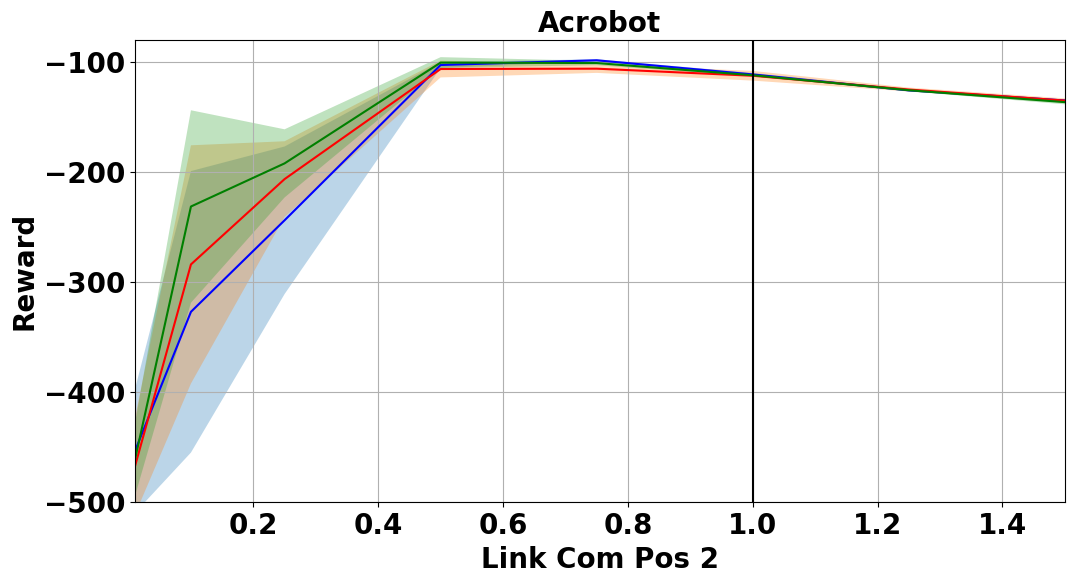

In [188]:
plt.clf()
fontsize = 20
fig, ax = plt.subplots(figsize=(12, 6))

vanilla_ac_mean = np.mean(vanilla_ac_rew, axis=0)
vanilla_ac_std = np.std(vanilla_ac_rew, axis=0)

r2_ac_mean = np.mean(r2_ac_rew, axis=0)
r2_ac_std = np.std(r2_ac_rew, axis=0)

robust_ac_mean = np.mean(robust_ac_rew, axis=0)
robust_ac_std = np.std(robust_ac_rew, axis=0)

ax.plot(sweep_vector, vanilla_ac_mean,'b', label='Vanilla') 
ax.fill_between(sweep_vector, vanilla_ac_mean-vanilla_ac_std, vanilla_ac_mean+vanilla_ac_std, alpha=0.3)
ax.plot(sweep_vector, r2_ac_mean,'r', label='R2') 
ax.fill_between(sweep_vector, r2_ac_mean-r2_ac_std, r2_ac_mean+r2_ac_std, alpha=0.3)

ax.plot(sweep_vector, robust_ac_mean,'g', label='Robust')
ax.fill_between(sweep_vector, robust_ac_mean-robust_ac_std, robust_ac_mean+robust_ac_std, alpha=0.3)

    
ax.invert_xaxis()
ax.set_xlabel('Link Com Pos 2', fontsize=fontsize)
ax.set_ylabel('Reward', fontsize=fontsize)
ax.set_title('Acrobot', fontweight="bold", fontsize=fontsize)
ax.set_yticks(range(-500,-80,100))
ax.set_ylim([-500, -80])
ax.set_xlim(np.min(sweep_vector),np.max(sweep_vector))
ax.set_xlim(np.min(sweep_vector),1.5)
plt.axvline(x=1, c='black')
ax.tick_params(axis='both', labelsize=fontsize)

ax.grid(True)
# ax.legend()
plt.savefig(os.path.abspath('../plots/acrobot_linkcompos2_full_mean.png'))

# Acrobot link_mass_2

In [189]:
sweep_str = 'link_mass_2'
sweep_vector = get_sweep_params(1, sweep_str)
sweep_param = [sweep_vector, sweep_str]

In [190]:
file_end = '.npy'
vanilla_ac_file_rew = temp_vanilla_ac_file_rew + sweep_str + file_end
vanilla_ac_file_error = temp_vanilla_ac_file_error + sweep_str + file_end

r2_ac_file_rew = temp_r2_ac_file_rew + sweep_str + file_end
r2_ac_file_error = temp_r2_ac_file_error + sweep_str + file_end

robust_ac_file_rew = temp_robust_ac_file_rew + sweep_str + file_end
robust_ac_file_error = temp_robust_ac_file_error + sweep_str + file_end

# Vanilla DDQN acrobot evaluation

In [41]:
model_subfolder = 'vanilla_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [42]:
vanilla_ac_rew, vanilla_ac_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 8/8 [02:37<00:00, 19.70s/it]
1it [02:37, 157.60s/it]
100%|█████████████████████████████████████████████| 8/8 [02:24<00:00, 18.02s/it]
2it [05:01, 153.57s/it]
100%|█████████████████████████████████████████████| 8/8 [03:34<00:00, 26.86s/it]
3it [08:36, 171.97s/it]
100%|█████████████████████████████████████████████| 8/8 [02:23<00:00, 17.90s/it]
4it [10:59, 163.34s/it]
100%|█████████████████████████████████████████████| 8/8 [01:21<00:00, 10.22s/it]
5it [12:21, 148.33s/it]


In [43]:
np.save(vanilla_ac_file_rew, vanilla_ac_rew)
np.save(vanilla_ac_file_error, vanilla_ac_error)

In [44]:
vanilla_ac_rew

array([[-439.5, -193.5, -150.4, -108.3, -106. , -111.4, -129.5, -153.7],
       [-335.5, -241.5, -139.1,  -87.3, -110.7, -112.2, -132.6, -156.9],
       [-489.5, -288.8, -126.9, -105.7, -104.8, -110.5, -130.1, -153.7],
       [-473. , -467. , -175.2, -110.8, -107.1, -106.6, -131.6, -157.3],
       [-267.5,  -94.5, -155.9,  -95.5,  -98.7, -114.7, -130.8, -154.6]])

# R2 DDQN acrobot evaluation

In [45]:
model_subfolder = 'r2_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [46]:
r2_ac_rew, r2_ac_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 8/8 [01:29<00:00, 11.20s/it]
1it [01:29, 89.62s/it]
100%|█████████████████████████████████████████████| 8/8 [01:21<00:00, 10.23s/it]
2it [02:51, 87.29s/it]
100%|█████████████████████████████████████████████| 8/8 [01:42<00:00, 12.80s/it]
3it [04:33, 91.84s/it]
100%|█████████████████████████████████████████████| 8/8 [01:35<00:00, 12.00s/it]
4it [06:09, 93.09s/it]
100%|█████████████████████████████████████████████| 8/8 [01:37<00:00, 12.13s/it]
5it [07:46, 93.39s/it]


In [47]:
np.save(r2_ac_file_rew, r2_ac_rew)
np.save(r2_ac_file_error, r2_ac_error)

In [48]:
r2_ac_rew

array([[-371.5, -165.2, -150.6,  -98.2, -106.3, -112.3, -132.8, -152. ],
       [-253.1, -209.3, -102.7, -114.5, -108.2, -110.6, -131.2, -154.1],
       [-500. , -185. , -138.7,  -99.4, -103.9, -114.8, -132.1, -158.9],
       [-429.2, -180.6, -160.4, -101. , -107.1, -111.4, -132.4, -157.3],
       [-485.4, -194.5, -114.3,  -90.6, -100.2, -112.6, -130.5, -155.7]])

# Robust DDQN acrobot evaluation

In [75]:
model_subfolder = 'ro_acrobot_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [76]:
robust_ac_rew, robust_ac_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 8/8 [02:30<00:00, 18.81s/it]
1it [02:30, 150.47s/it]
100%|█████████████████████████████████████████████| 8/8 [03:15<00:00, 24.42s/it]
2it [05:45, 163.95s/it]
100%|█████████████████████████████████████████████| 8/8 [01:44<00:00, 13.00s/it]
3it [07:29, 145.97s/it]
100%|█████████████████████████████████████████████| 8/8 [02:06<00:00, 15.78s/it]
4it [09:36, 140.06s/it]
100%|█████████████████████████████████████████████| 8/8 [02:08<00:00, 16.02s/it]
5it [11:44, 140.86s/it]


In [77]:
np.save(robust_ac_file_rew, robust_ac_rew)
np.save(robust_ac_file_error, robust_ac_error)

In [78]:
robust_ac_rew

array([[-328.3, -172.2, -132.1, -103.1, -105.8, -112.3, -130.1, -153.6],
       [-335.2, -154.3, -112.8, -103.5, -108.6, -107.6, -130.8, -154. ],
       [-270.6, -182.4, -162.4,  -90.7, -103.9, -111.2, -133.5, -156.8],
       [-365.2, -128.9, -102.9,  -95.2, -106.1, -111.5, -130.7, -155.3],
       [-412.4, -253.7, -133.2, -111.7, -104.9, -111.2, -130. , -159.1]])

# Load data

In [191]:
vanilla_ac_rew = np.load(vanilla_ac_file_rew)
vanilla_ac_error = np.load(vanilla_ac_file_error)

In [192]:
r2_ac_rew = np.load(r2_ac_file_rew)
r2_ac_error = np.load(r2_ac_file_error)

In [193]:
robust_ac_rew = np.load(robust_ac_file_rew)
robust_ac_error = np.load(robust_ac_file_error)

<Figure size 640x480 with 0 Axes>

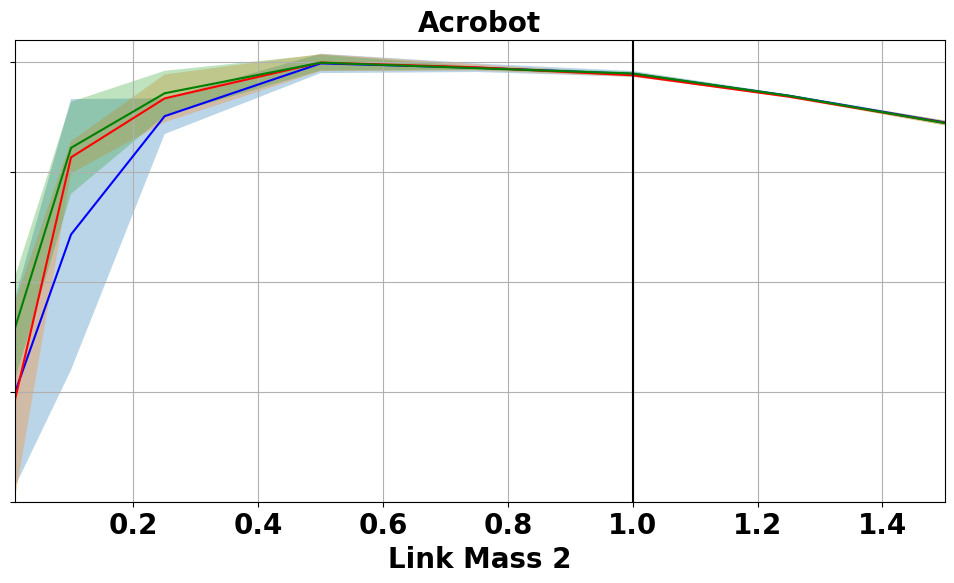

In [194]:
plt.clf()
fontsize = 20
fig, ax = plt.subplots(figsize=(12, 6))

vanilla_ac_mean = np.mean(vanilla_ac_rew, axis=0)
vanilla_ac_std = np.std(vanilla_ac_rew, axis=0)

r2_ac_mean = np.mean(r2_ac_rew, axis=0)
r2_ac_std = np.std(r2_ac_rew, axis=0)

robust_ac_mean = np.mean(robust_ac_rew, axis=0)
robust_ac_std = np.std(robust_ac_rew, axis=0)

ax.plot(sweep_vector, vanilla_ac_mean,'b', label='Vanilla') 
ax.fill_between(sweep_vector, vanilla_ac_mean-vanilla_ac_std, vanilla_ac_mean+vanilla_ac_std, alpha=0.3)
ax.plot(sweep_vector, r2_ac_mean,'r', label='R2') 
ax.fill_between(sweep_vector, r2_ac_mean-r2_ac_std, r2_ac_mean+r2_ac_std, alpha=0.3)

ax.plot(sweep_vector, robust_ac_mean,'g', label='Robust')
ax.fill_between(sweep_vector, robust_ac_mean-robust_ac_std, robust_ac_mean+robust_ac_std, alpha=0.3)

    
ax.invert_xaxis()
ax.set_xlabel('Link Mass 2', fontsize=fontsize)
# ax.set_ylabel('Reward')
ax.set_title('Acrobot', fontweight="bold", fontsize=fontsize)
ax.set_yticks(range(-500,-80,100))
ax.set_ylim([-500, -80])
ax.set_xlim(np.min(sweep_vector),np.max(sweep_vector))
ax.tick_params(axis='both', labelsize=fontsize)

plt.axvline(x=1, c='black')
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])

ax.grid(True)
# ax.legend()

plt.savefig(os.path.abspath('../plots/acrobot_linkmass2_full_mean.png'))

# MountainCar

In [200]:
updater = UpdateMountaincarParams()
args = updater.update_parser(ddqn_parser)[0]
args.EnvIdex = 2

In [201]:
temp_vanilla_mc_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_rew_mountaincar_sweep'))
temp_vanilla_mc_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'vanilla_error_mountaincar_sweep'))

temp_r2_mc_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'r2_rew_mountaincar_sweep'))
temp_r2_mc_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'r2_error_mountaincar_sweep'))

temp_robust_mc_file_rew = os.path.abspath(os.path.join('.', 'plot_data', 'robust_rew_mountaincar'))
temp_robust_mc_file_error = os.path.abspath(os.path.join('.', 'plot_data', 'robust_error_mountaincar'))

# Mountaincar gravity

In [202]:
sweep_str = 'gravity'
sweep_vector = get_sweep_params(2, sweep_str)
sweep_param = [sweep_vector, sweep_str]

In [203]:
file_end = '.npy'
vanilla_mc_file_rew = temp_vanilla_mc_file_rew + sweep_str + file_end
vanilla_mc_file_error = temp_vanilla_mc_file_error + sweep_str + file_end

r2_mc_file_rew = temp_r2_mc_file_rew + sweep_str + file_end
r2_mc_file_error = temp_r2_mc_file_error + sweep_str + file_end

robust_mc_file_rew = temp_robust_mc_file_rew + sweep_str + file_end
robust_mc_file_error = temp_robust_mc_file_error + sweep_str + file_end

# Vanilla DDQN mountaincar evaluation

In [13]:
model_subfolder = 'vanilla_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [14]:
vanilla_mc_rew, vanilla_mc_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

In [15]:
np.save(vanilla_mc_file_rew, vanilla_mc_rew)
np.save(vanilla_mc_file_error, vanilla_mc_error)

In [16]:
vanilla_mc_rew

array([[ -65.8,  -64.4, -119.9, -110.3, -102.9, -104.2, -125.2, -144.1,
        -200. , -200. , -200. , -200. ],
       [-200. , -200. , -200. , -107.3,  -97. , -138.8, -150.8, -147.1,
        -174.6, -200. , -200. , -200. ],
       [ -93.5,  -91. ,  -90.9,  -94. ,  -94.9, -133.6, -158.4, -161.4,
        -177.9, -200. , -200. , -200. ],
       [ -93.2,  -91. ,  -90.9,  -86. ,  -86.8, -125.1, -135.6, -133.7,
        -177.8, -200. , -200. , -200. ],
       [ -94.3,  -91.6,  -90.1,  -84. ,  -86.8, -131.2, -134.3, -137.5,
        -175. , -200. , -200. , -200. ]])

# R2 DDQN mountaincar evaluation

In [17]:
model_subfolder = 'r2_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [18]:
r2_mc_rew, r2_mc_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

In [19]:
np.save(r2_mc_file_rew, r2_mc_rew)
np.save(r2_mc_file_error, r2_mc_error)

In [20]:
r2_mc_rew

array([[ -69. ,  -67.2, -107.1, -106. , -100.7, -109. , -122.4, -139.7,
        -151. , -200. , -200. , -200. ],
       [ -66.8,  -65.8,  -88.1, -113.4, -100.3,  -99.9, -118.7, -141. ,
        -152.7, -200. , -200. , -200. ],
       [ -92.1,  -88.2,  -94. , -100.2,  -92.5, -126. , -137.8, -137.5,
        -173.3, -200. , -200. , -200. ],
       [ -93. ,  -89.2,  -90.2,  -94.6,  -90.4, -122.3, -135.4, -130.1,
        -170.9, -200. , -200. , -200. ],
       [ -68.6,  -68.4,  -72.8, -109.2, -100. , -106.1, -121. , -140.4,
        -152.6, -200. , -200. , -200. ]])

# Robust DDQN mountaincar evaluation

In [21]:
model_subfolder = 'ro_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [22]:
robust_mc_rew, robust_mc_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

In [23]:
np.save(robust_mc_file_rew, robust_mc_rew)
np.save(robust_mc_file_error, robust_mc_error)

In [24]:
robust_mc_rew

array([[ -94.5,  -85.4,  -79.5, -111.7, -111.6, -138.5, -128.1, -140.7,
        -170.6, -200. , -200. , -200. ],
       [ -45.1,  -50. ,  -63.4, -160.3, -138. , -128.1, -156.2, -170.9,
        -175.9, -200. , -200. , -200. ],
       [ -51.5,  -53.7,  -64.4, -151.3, -130.1, -140.9, -167.6, -172.2,
        -195. , -200. , -200. , -200. ],
       [ -99.7,  -83.1,  -79.1,  -84.7, -132. , -141.7, -131.4, -158.5,
        -176. , -200. , -200. , -200. ],
       [ -50.6,  -53.8,  -65.2, -135.9, -123.7, -157. , -165.9, -188.9,
        -199.1, -200. , -200. , -200. ]])

# Load data

In [204]:
vanilla_mc_rew = np.load(vanilla_mc_file_rew)
vanilla_mc_error = np.load(vanilla_mc_file_error)

In [205]:
r2_mc_rew = np.load(r2_mc_file_rew)
r2_mc_error = np.load(r2_mc_file_error)

In [206]:
robust_mc_rew = np.load(robust_mc_file_rew)
robust_mc_error = np.load(robust_mc_file_error)

<Figure size 640x480 with 0 Axes>

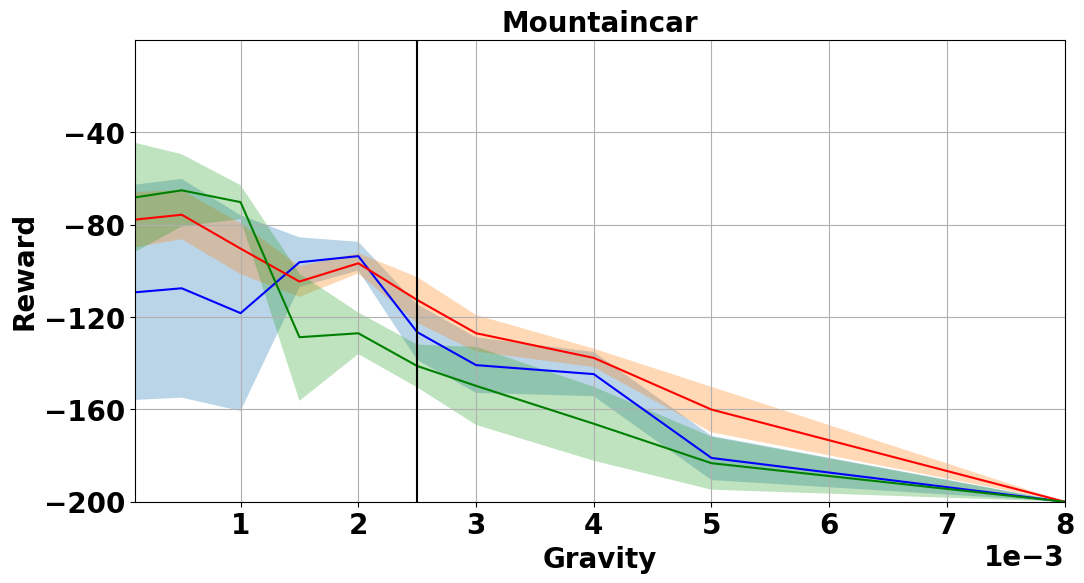

In [207]:
plt.clf()
fontsize = 20
fig, ax = plt.subplots(figsize=(12, 6))

vanilla_mc_mean = np.mean(vanilla_mc_rew, axis=0)
vanilla_mc_std = np.std(vanilla_mc_rew, axis=0)

r2_mc_mean = np.mean(r2_mc_rew, axis=0)
r2_mc_std = np.std(r2_mc_rew, axis=0)

robust_mc_mean = np.mean(robust_mc_rew, axis=0)
robust_mc_std = np.std(robust_mc_rew, axis=0)

ax.plot(sweep_vector, vanilla_mc_mean,'b', label='Vanilla') 
ax.fill_between(sweep_vector, vanilla_mc_mean-vanilla_mc_std, vanilla_mc_mean+vanilla_mc_std, alpha=0.3)
ax.plot(sweep_vector, r2_mc_mean,'r', label='R2') 
ax.fill_between(sweep_vector, r2_mc_mean-r2_mc_std, r2_mc_mean+r2_mc_std, alpha=0.3)

ax.plot(sweep_vector, robust_mc_mean,'g', label='Robust')
ax.fill_between(sweep_vector, robust_mc_mean-robust_mc_std, robust_mc_mean+robust_mc_std, alpha=0.3)

    
ax.invert_xaxis()
ax.set_xlabel('Gravity', fontsize=fontsize)
ax.set_ylabel('Reward', fontsize=fontsize)
ax.set_title('Mountaincar', fontweight="bold", fontsize=fontsize)
ax.set_yticks(range(-200, 0,40))
ax.set_ylim([-200, 0])
ax.set_xlim(np.min(sweep_vector),np.max(sweep_vector))
ax.set_xlim(np.min(sweep_vector), 0.008)
plt.axvline(x=0.0025, c='black')
ax.tick_params(axis='both', labelsize=fontsize)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.xaxis.get_offset_text().set_fontsize(fontsize)

ax.grid(True)
# ax.legend()

plt.savefig(os.path.abspath('../plots/mountaincar_gravity_full_mean.png'))

# Mountaincar force

In [208]:
sweep_str = 'force'
sweep_vector = get_sweep_params(2, sweep_str)
sweep_param = [sweep_vector, sweep_str]

In [209]:
file_end = '.npy'
vanilla_mc_file_rew = temp_vanilla_mc_file_rew + sweep_str + file_end
vanilla_mc_file_error = temp_vanilla_mc_file_error + sweep_str + file_end

r2_mc_file_rew = temp_r2_mc_file_rew + sweep_str + file_end
r2_mc_file_error = temp_r2_mc_file_error + sweep_str + file_end

robust_mc_file_rew = temp_robust_mc_file_rew + sweep_str + file_end
robust_mc_file_error = temp_robust_mc_file_error + sweep_str + file_end

# Vanilla DDQN mountaincar evaluation

In [31]:
model_subfolder = 'vanilla_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [32]:
vanilla_mc_rew, vanilla_mc_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

In [33]:
np.save(vanilla_mc_file_rew, vanilla_mc_rew)
np.save(vanilla_mc_file_error, vanilla_mc_error)

In [34]:
vanilla_mc_rew

array([[-200. , -200. , -200. , -176. , -143.3, -103.8,  -72.3,  -38.4,
         -33.3,  -32.1,  -30.1],
       [-200. , -200. , -200. , -180.1, -165.1, -133. ,  -79.1, -200. ,
        -200. , -200. , -200. ],
       [-200. , -200. , -200. , -188.9, -170.9, -134.3,  -68.7,  -50. ,
         -44. ,  -42. ,  -40. ],
       [-200. , -200. , -200. , -176.9, -149. , -125.4,  -64.8,  -50. ,
         -44. ,  -42. ,  -40. ],
       [-200. , -200. , -200. , -173. , -148.7, -123.7,  -64. ,  -50. ,
         -45. ,  -42. ,  -40. ]])

# R2 DDQN mountaincar evaluation

In [35]:
model_subfolder = 'r2_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [36]:
r2_mc_rew, r2_mc_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

In [37]:
np.save(r2_mc_file_rew, r2_mc_rew)
np.save(r2_mc_file_error, r2_mc_error)

In [38]:
r2_mc_rew

array([[-200. , -200. , -200. , -177.6, -135.1, -107.8,  -63.5,  -39.4,
         -33.3,  -30.4,  -30.3],
       [-200. , -200. , -200. , -175.8, -145.2, -100.3,  -63.5,  -35.7,
         -31.5,  -28.1,  -27.9],
       [-200. , -200. , -200. , -175.9, -150.4, -124.7,  -69.6,  -47.8,
         -43.7,  -40.9,  -38.7],
       [-200. , -200. , -200. , -170.3, -148.1, -126.4,  -68.6,  -49.6,
         -43.5,  -41.8,  -40. ],
       [-200. , -200. , -200. , -176. , -132.3, -106.7,  -57.7,  -37. ,
         -31.9,  -29.2,  -27. ]])

# Robust DDQN mountaincar evaluation

In [39]:
model_subfolder = 'ro_mountaincar_sweep'
model_name = os.listdir(os.path.abspath(os.path.join('DQN', 'model', model_subfolder)))
model_gen = LoadModel(args, subfolder=model_subfolder, model_name=model_name)

In [40]:
robust_mc_rew, robust_mc_error = train_and_evaluate(args, sweep_param, model_gen, n_iter=10)

In [41]:
np.save(robust_mc_file_rew, robust_mc_rew)
np.save(robust_mc_file_error, robust_mc_error)

In [42]:
robust_mc_rew

array([[-200. , -200. , -200. , -186.4, -154.1, -135.8,  -63.1,  -44.1,
         -45.1,  -40.7,  -38.3],
       [-200. , -200. , -200. , -199.1, -176.2, -129.7,  -79.8,  -26. ,
         -21. ,  -18.7,  -17.7],
       [-200. , -200. , -200. , -200. , -188.3, -141.3,  -70. ,  -28. ,
         -22.9,  -21.4,  -19.5],
       [-200. , -200. , -200. , -196.9, -146.8, -141.5,  -56.6,  -48.6,
         -44.7,  -42.6,  -41.3],
       [-200. , -200. , -200. , -200. , -187.6, -160.2,  -67.6,  -28.3,
         -22.7,  -21. ,  -20.1]])

# Load data

In [210]:
vanilla_mc_rew = np.load(vanilla_mc_file_rew)
vanilla_mc_error = np.load(vanilla_mc_file_error)

In [211]:
r2_mc_rew = np.load(r2_mc_file_rew)
r2_mc_error = np.load(r2_mc_file_error)

In [212]:
robust_mc_rew = np.load(robust_mc_file_rew)
robust_mc_error = np.load(robust_mc_file_error)

<Figure size 640x480 with 0 Axes>

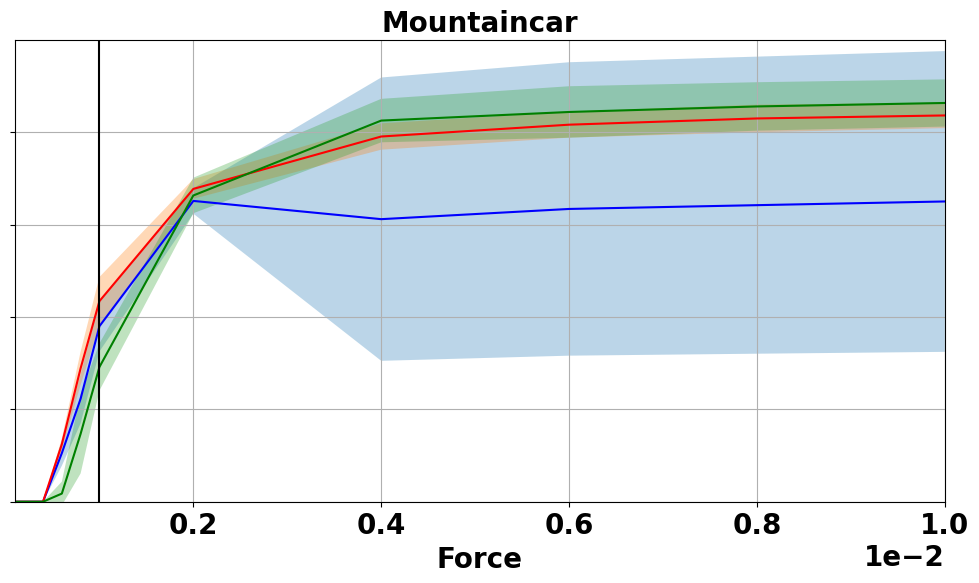

In [213]:
plt.clf()
fontsize = 20
fig, ax = plt.subplots(figsize=(12, 6))

vanilla_mc_mean = np.mean(vanilla_mc_rew, axis=0)
vanilla_mc_std = np.std(vanilla_mc_rew, axis=0)

r2_mc_mean = np.mean(r2_mc_rew, axis=0)
r2_mc_std = np.std(r2_mc_rew, axis=0)

robust_mc_mean = np.mean(robust_mc_rew, axis=0)
robust_mc_std = np.std(robust_mc_rew, axis=0)

ax.plot(sweep_vector, vanilla_mc_mean,'b', label='Vanilla') 
ax.fill_between(sweep_vector, vanilla_mc_mean-vanilla_mc_std, vanilla_mc_mean+vanilla_mc_std, alpha=0.3)
ax.plot(sweep_vector, r2_mc_mean,'r', label='R2') 
ax.fill_between(sweep_vector, r2_mc_mean-r2_mc_std, r2_mc_mean+r2_mc_std, alpha=0.3)

ax.plot(sweep_vector, robust_mc_mean,'g', label='Robust')
ax.fill_between(sweep_vector, robust_mc_mean-robust_mc_std, robust_mc_mean+robust_mc_std, alpha=0.3)

    
ax.invert_xaxis()
ax.set_xlabel('Force', fontsize=fontsize)
# ax.set_ylabel('Reward', fontsize=fontsize)
ax.set_title('Mountaincar', fontweight="bold", fontsize=fontsize)
ax.set_yticks(range(-200, 0,40))
ax.set_ylim([-200, 0])
ax.set_xlim(np.min(sweep_vector),np.max(sweep_vector))
# ax.set_xlim(1, 10)
ax.tick_params(axis='both', labelsize=fontsize)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.xaxis.get_offset_text().set_fontsize(fontsize)

plt.axvline(x=0.001, c='black')

frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])

ax.grid(True)
# ax.legend()

plt.savefig(os.path.abspath('../plots/mountaincar_force_full_mean.png'))